In [1]:
#Import libraries

import numpy as np
import pandas as pd
from datetime import datetime, timedelta  
import seaborn as sns
import matplotlib.pyplot as plt
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [13]:
#Load the dataset
#ratings
rating=pd.read_csv('ratings.csv')
#movies
movie=pd.read_csv('movies.csv')

#merge the data
df=pd.merge(rating,movie, on='movieId')
print(df.head())

print(movie.head())

   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genr

In [3]:
#Add Timestamp to Ratings
#Task: Add a timestamp column to your CSV (random dates).
#Use Python to find: 1. Ratings given in last 30 days    2.Ratings given before 6 months


#add the timestamp
np.random.seed(42)  # For reproducibility
df['timestamp'] = pd.to_datetime('today') - pd.to_timedelta(np.random.randint(0, 365, df.shape[0]), unit='D')
print(df.head(10))

#Last 30 days rating 
last_30_days = df[df['timestamp'] >= pd.to_datetime('today') - pd.Timedelta(days=30)]
print("\nRatings given in the last 30 days:", last_30_days.shape[0])  #here shape give how many ratings means count
print(last_30_days[['userId', 'title', 'rating', 'timestamp']].head())

#Last 6months before rating data
before_6_months = df[df['timestamp'] <= pd.to_datetime('today') - pd.Timedelta(days=180)]
print("\nRatings given before 6 months:", before_6_months.shape[0])
print(before_6_months[['userId', 'title', 'rating', 'timestamp']].head())

   userId  movieId  rating                  timestamp             title  \
0       1        1     4.0 2025-03-15 15:02:05.673035  Toy Story (1995)   
1       5        1     4.0 2024-07-12 15:02:05.673035  Toy Story (1995)   
2       7        1     4.5 2024-09-28 15:02:05.673035  Toy Story (1995)   
3      15        1     2.5 2025-03-11 15:02:05.673035  Toy Story (1995)   
4      17        1     4.5 2025-04-15 15:02:05.673035  Toy Story (1995)   
5      18        1     3.5 2024-12-19 15:02:05.673035  Toy Story (1995)   
6      19        1     4.0 2025-06-05 15:02:05.673035  Toy Story (1995)   
7      21        1     3.5 2025-03-15 15:02:05.673035  Toy Story (1995)   
8      27        1     3.0 2025-02-24 15:02:05.673035  Toy Story (1995)   
9      31        1     5.0 2024-11-23 15:02:05.673035  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Chil

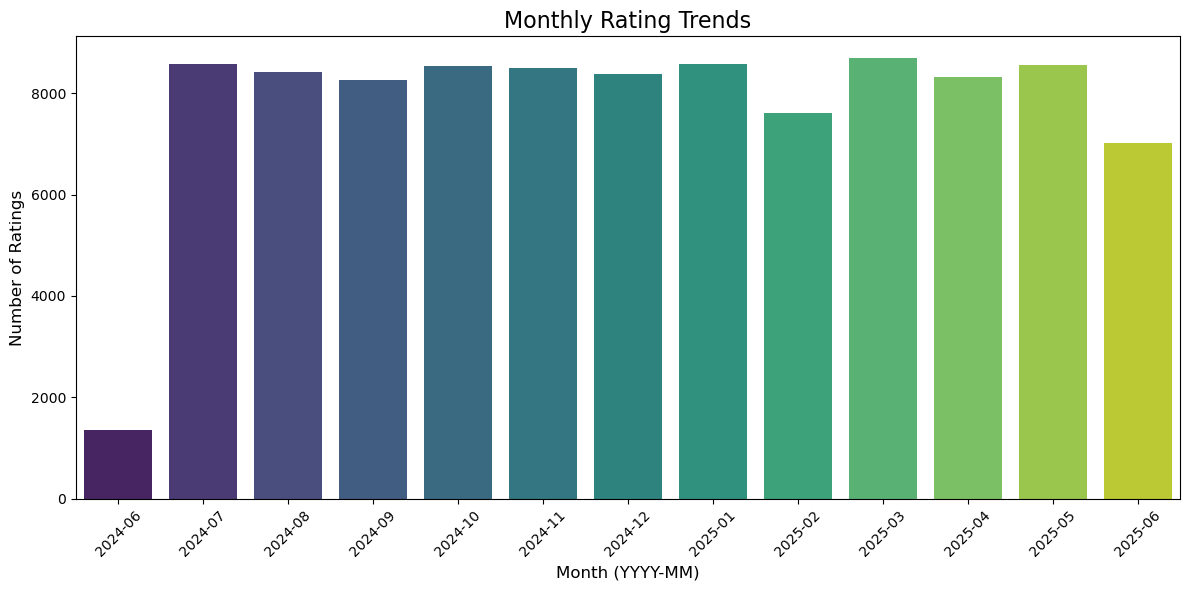

In [4]:
#Monthly Rating Trends
#Task: Group ratings by month.
# Plot how many ratings were given each month.
# 📊 Bar chart: Month vs Number of Ratings

# create group rating by month
df['rating_month'] = df['timestamp'].dt.to_period('M')

#Group by that month and count the number of ratings
monthly_counts = df.groupby('rating_month').size()

#Convert Period to string for plotting (better for display)
monthly_counts.index = monthly_counts.index.astype(str)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')

plt.title('Monthly Rating Trends', fontsize=16)
plt.xlabel('Month (YYYY-MM)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

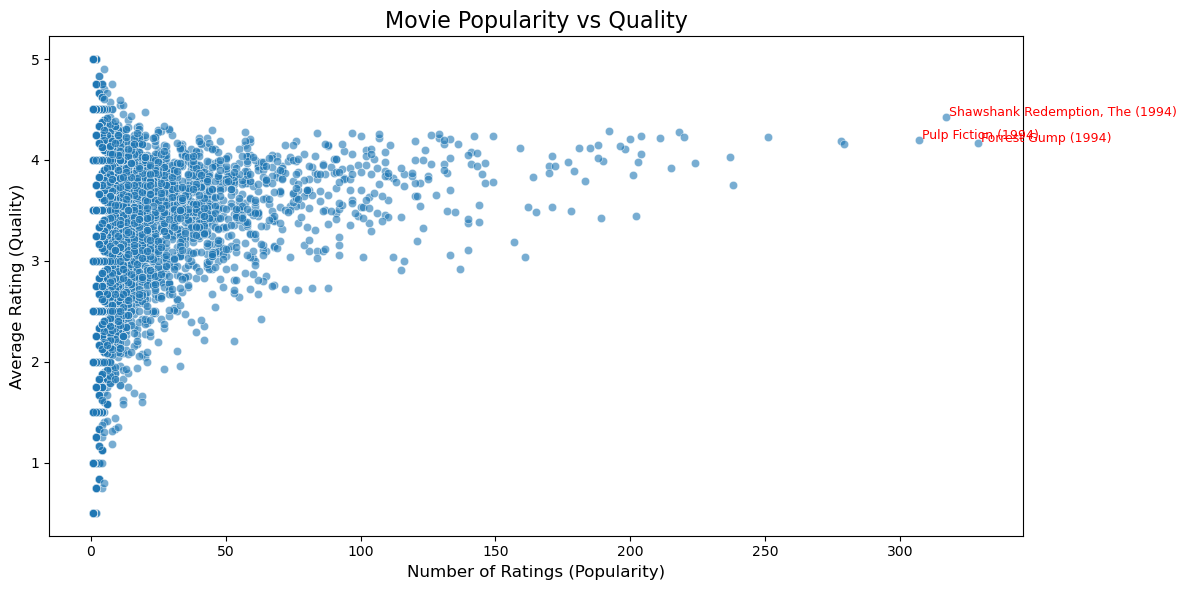

In [10]:
#Movie Popularity vs Quality
#Task: For each movie, calculate:
#avg_rating
#rating_count
#Plot using seaborn.scatterplot:
#X-axis: rating_count
#Y-axis: avg_rating
#Label top 3 most balanced movies

# Step 1: Calculate avg_rating and rating_count per movie
movie_stats = df.groupby('title')['rating'].agg(avg_rating='mean', rating_count='count').reset_index()

# Step 2: Plot popularity vs quality
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movie_stats, x='rating_count', y='avg_rating', alpha=0.6)

plt.title('Movie Popularity vs Quality', fontsize=16)
plt.xlabel('Number of Ratings (Popularity)', fontsize=12)
plt.ylabel('Average Rating (Quality)', fontsize=12)

# Step 3: Label top 3 most "balanced" movies
# Criteria: High rating + High rating_count
top_movies = movie_stats.sort_values(by=['rating_count', 'avg_rating'], ascending=[False, False]).head(3)

for i in range(3):
    plt.text(top_movies.iloc[i]['rating_count'] + 1,
             top_movies.iloc[i]['avg_rating'] + 0.01,
             top_movies.iloc[i]['title'],
             fontsize=9, color='red')

plt.tight_layout()
plt.show()

In [14]:
#Build Similarity Matrix
#Task: Use .corr() on user-movie pivot table.
# Show top 3 similar movies to a given movie (e.g., Inception).

# User-Movie Pivot Table
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')

# Create the correlation matrix
movie_similarity = movie_matrix.corr(method='pearson') # to find similarity between movies

movie_name = "Toy Story (1995)"  # Pick any movie from your data

if movie_name in movie_similarity.columns:
    similar_movies = movie_similarity[movie_name].dropna()
    top_similar = similar_movies.sort_values(ascending=False).drop(movie_name).head(3)
    print(f"\nTop 3 movies similar to '{movie_name}':\n")
    print(top_similar)
else:
    print("Movie not found in dataset!")




Top 3 movies similar to 'Toy Story (1995)':

title
Senna (2010)         1.0
Claim, The (2000)    1.0
Stalker (1979)       1.0
Name: Toy Story (1995), dtype: float64


# Pearson:-  
Pearson correlation measures how strongly two things are related.

In a recommendation system, it checks:

Do two users rate movies in a similar way?
or
Do two movies get similar ratings from users?

# Why do we use Pearson in recommendation?
Because users rate movies on a scale (1 to 5)

Pearson helps check how similar the patterns are in their ratings

It ignores the actual values and focuses on the pattern or relationship



In [15]:
#User-Based Similarity
#Task: Transpose pivot table (now: movie vs user).
#Use .corr() to find users most similar to User10.
# Recommend what those similar users liked.

# Transpose: movie vs user
user_matrix = df.pivot_table(index='title', columns='userId', values='rating')

# Correlation between User10 and all other users
user_similarity = user_matrix.corr(method='pearson')

# Get similar users to User10 (excluding self)
similar_users = user_similarity[10].dropna().sort_values(ascending=False).drop(10).head(3)

print("Top 3 users similar to User10:")
print(similar_users)

# Step 1: Movies already rated by User10
user10_seen = df[df['userId'] == 10]['title'].unique()

# Step 2: Movies rated by similar users
similar_user_ids = similar_users.index.tolist()

similar_users_ratings = df[df['userId'].isin(similar_user_ids)]

# Step 3: Filter movies not rated by User10
unseen_movies = similar_users_ratings[~similar_users_ratings['title'].isin(user10_seen)]

# Step 4: Recommend movies with highest average rating among those
recommendations = unseen_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)

print("\nRecommended movies for User10 based on similar users:")
print(recommendations)


Top 3 users similar to User10:
userId
574    1.0
478    1.0
179    1.0
Name: 10, dtype: float64

Recommended movies for User10 based on similar users:
title
Independence Day (a.k.a. ID4) (1996)    5.0
Babe (1995)                             5.0
Braveheart (1995)                       5.0
Name: rating, dtype: float64


# Cold Start Problem
#Task: Write 5 lines explaining:
#What is the cold start problem?
#How can we solve it for: New users, New movies

Cold Start Problem:- 
Cold Start Problem happens when we don’t have enough data to make recommendations.

For example, if a new user signs up on Netflix and hasn’t rated or watched any movies yet, we don’t know their taste.

Similarly, if a new movie is added to the platform but no user has rated it yet, we don’t know whom to recommend it to.

# How to solve it?
For new users:
→ Use their profile info (like age, location), or show popular/trending movies first.

For new movies:
→ Use movie metadata like genre, cast, or description to recommend it through content-based filtering.

In [16]:
#Top 3 Movies by Genre
#Task: Ask user to enter favorite genre (like "Sci-fi")
# Show top 3 movies (with highest avg rating) from that genre.

# Ask the user for their favorite genre
fav_genre = input("Enter your favorite genre (e.g., Action, Comedy, Sci-Fi): ").lower()

# Filter movies that belong to that genre
genre_movies = df[df['genres'].str.lower().str.contains(fav_genre)]

# Group by title and calculate average rating
avg_ratings = genre_movies.groupby('title')['rating'].mean()

# Filter only those rated at least 5 times
rating_counts = genre_movies.groupby('title')['rating'].count()
filtered = avg_ratings[rating_counts >= 5]  # who give rating more than 5 users consider here 

# Sort and show top 3
top3 = filtered.sort_values(ascending=False).head(3)

# Output
print(f"\nTop 3 highest-rated '{fav_genre.title()}' movies:")
print(top3)

Enter your favorite genre (e.g., Action, Comedy, Sci-Fi):  comedy



Top 3 highest-rated 'Comedy' movies:
title
Swept Away (Travolti da un insolito destino nell'azzurro mare d'Agosto) (1975)    4.666667
Man Bites Dog (C'est arrivé près de chez vous) (1992)                             4.500000
Kolya (Kolja) (1996)                                                              4.428571
Name: rating, dtype: float64


In [21]:
#Collaborative Filtering with Cosine Similarity
#Task: Install sklearn, use cosine_similarity instead of .corr().
# Recommend top 3 similar movies to any given movie title.

from sklearn.metrics.pairwise import cosine_similarity
# User-Movie Pivot Table
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.fillna(0, inplace=True)  # fill missing ratings with 0

pivot = movie_matrix.T  # Now rows = movies, columns = users

# Calculate cosine similarity between movies
cos_sim = cosine_similarity(pivot)

# Put it in a DataFrame with movie titles as index and columns
cos_sim_df = pd.DataFrame(cos_sim, index=pivot.index, columns=pivot.index)

movie_name = input("Enter a movie title: ")

if movie_name in cos_sim_df.columns:
    similar_movies = cos_sim_df[movie_name].sort_values(ascending=False).drop(movie_name).head(3)
    print(f"\nTop 3 movies similar to '{movie_name}':")
    print(similar_movies)
else:
    print("Movie not found in the database.")


Enter a movie title:  Kolya (Kolja) (1996)



Top 3 movies similar to 'Kolya (Kolja) (1996)':
title
Closet, The (Placard, Le) (2001)    0.548401
Ulee's Gold (1997)                  0.525480
Thousand Acres, A (1997)            0.481256
Name: Kolya (Kolja) (1996), dtype: float64


# End-to-End Mini Project
#Task: Build a full Python-based recommender:
Input: user name, optional genre
Backend: user-based or movie-based collaborative filtering
Output: 3 recommended movies
Extras: rating distribution graph, similar users' favorite chart

In [25]:
# Create Pivot Table
pivot = df.pivot_table(index='userId', columns='title', values='rating')
pivot.fillna(0, inplace=True)

#Ask User Input
user_id = int(input("Enter your userId (e.g., 10): "))
fav_genre = input("Optional: Enter a genre (or press Enter to skip): ").lower()

#Recommend Top 3 Movies (User-based)
# Transpose to movie-user
movie_user_matrix = pivot.T
user_similarity = cosine_similarity(pivot)
user_sim_df = pd.DataFrame(user_similarity, index=pivot.index, columns=pivot.index)

# Get similar users (excluding self)
similar_users = user_sim_df[user_id].drop(user_id).sort_values(ascending=False).head(3)
similar_user_ids = similar_users.index.tolist()

# Movies rated by similar users
similar_users_ratings = df[df['userId'].isin(similar_user_ids)]

# Movies seen by the target user
user_seen = df[df['userId'] == user_id]['title'].unique()

# Movies not seen by user
unseen_movies = similar_users_ratings[~similar_users_ratings['title'].isin(user_seen)]

# If genre filter applied
if fav_genre:
    unseen_movies = unseen_movies[unseen_movies['genres'].str.lower().str.contains(fav_genre)]

# Recommend top 3 unseen by user, liked by similar users
top3 = unseen_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)

print(f"\nTop 3 movie recommendations for User {user_id} (genre: {fav_genre if fav_genre else 'Any'}):\n")
print(top3)



Enter your userId (e.g., 10):  4
Optional: Enter a genre (or press Enter to skip):  



Top 3 movie recommendations for User 4 (genre: Any):

title
Third Man, The (1949)           5.0
It Happened One Night (1934)    5.0
Boogie Nights (1997)            5.0
Name: rating, dtype: float64


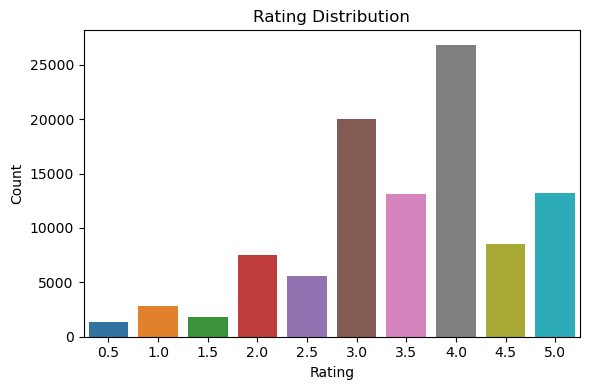

In [22]:
#Rating Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


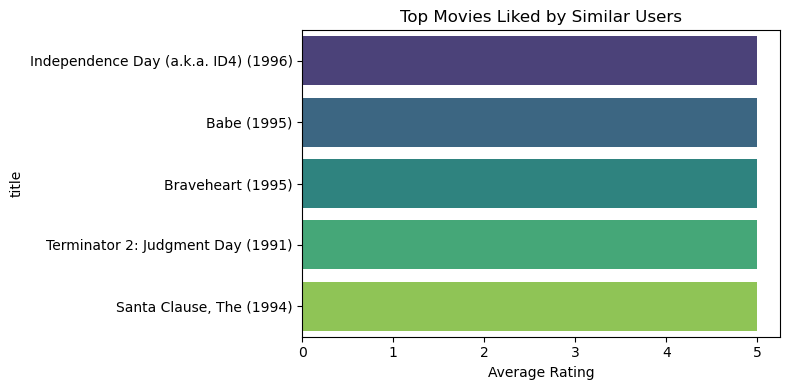

In [23]:
#Similar Users’ Favorite Movies
plt.figure(figsize=(8,4))
fav_movies = unseen_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=fav_movies.values, y=fav_movies.index, palette='viridis')
plt.title("Top Movies Liked by Similar Users")
plt.xlabel("Average Rating")
plt.tight_layout()
plt.show()
